In [2]:
import pandas as pd
import re
import geopandas as gpd
import netaddr
from bisect import bisect 
import zipfile
from io import BytesIO
import rasterio
from graphviz import Graph, Digraph
import numpy as np
from rasterio.mask import mask
import sqlite3
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression, LogisticRegression

ModuleNotFoundError: No module named 'netaddr'

In [2]:
# project: p6
# submitter: walmousa
# partner: none
# hours: 5

In [3]:
df1 = gpd.read_file("counties.geojson")

In [4]:
#Q1: 
len(df1)

72

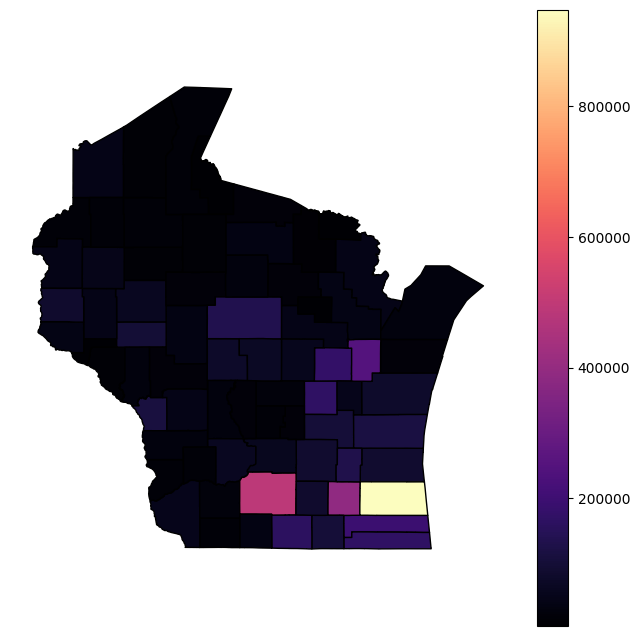

In [5]:
#Q2: 
ax=df1.plot(column=df1["POP100"], cmap="magma", edgecolor="k", figsize=(8, 8), legend= True)
ax.set_axis_off()

In [6]:
#FEATURE 1: 
conn= sqlite3.connect("counties_tracts.db")
area_data= pd.read_sql("SELECT AREALAND, NAME FROM counties", conn)
area_dict=dict(zip(area_data["NAME"], area_data["AREALAND"]))
df1["AREALAND"]=df1["NAME"].map(area_dict)
train, test = train_test_split(df1, random_state=250, test_size=0.25) 

In [7]:
#Q3: 
list(test["NAME"])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [8]:
#Q4: 
lr1=LinearRegression()
lr1.fit(train[["AREALAND"]], train[["POP100"]])
predict=lr1.predict(test[["AREALAND"]])
lr1.score(test[["AREALAND"]], test[["POP100"]])

0.016720430179409274

In [9]:
#Q5: 
area = 400 * 1000000 * 2.58998811
float(lr1.predict([[area]]))

/home/walee/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90000.17977388286

In [10]:
#Feature 2:
hu100= pd.read_sql("SELECT counties.county, counties.name, SUM(HU100) as hu100 from counties INNER JOIN tracts on counties.county = tracts.county group by counties.county", conn)
hu_dict = dict(zip(hu100["NAME"], hu100["hu100"]))
df1["HU100"] = df1["NAME"].map(hu_dict)
train2, test2 = train_test_split(df1, random_state=250, test_size=0.25) 

In [11]:
#Q6: 
list(test2["NAME"])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [12]:
#Q7: 
hu_dict={}
for idx in range(len(test2)):
    hu_dict[test2["NAME"].iloc[idx]]=test2["HU100"].iloc[idx]
    
hu_dict

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [13]:
#Q8: 
lr2=LinearRegression()
lr2.fit(train2[["HU100"]], train2[["POP100"]])
predict=lr2.predict(test2[["HU100"]])
scores = cross_val_score(lr2, train2[["HU100"]], train2[["POP100"]])
sum(scores)/len(scores)

0.9739348181232653

In [14]:
#Q9: 
scores.std()

0.01693954236334351

In [15]:
#Q10: 

coef = round(lr2.coef_[0][0], 2)
intercept = round(lr2.intercept_[0], 2)
ans=(f"POP100 = {coef}*HU100 + {intercept}")
ans

'POP100 = 2.47*HU100 + -9276.89'

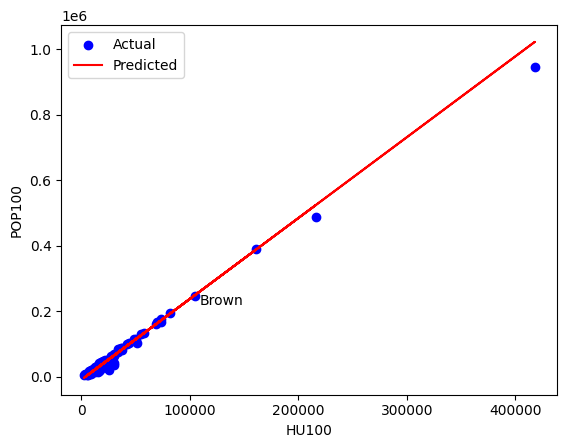

In [16]:
#Q11:

fig, ax = plt.subplots()

ax.scatter(train2["HU100"], train2["POP100"], label="Actual", color="b")
ax.scatter(test2["HU100"], test2["POP100"], color="b")

x_fit = pd.DataFrame({"HU100": df1["HU100"]})
y_fit = lr2.predict(x_fit)
ax.plot(x_fit, y_fit, label="Predicted", color="r")
brown_county = train2[train2["NAME"] == "Brown County"]
ax.text(brown_county["HU100"] +5000, brown_county["POP100"]-30000, "Brown")
ax.legend()
ax.set_xlabel("HU100")
ax.set_ylabel("POP100")
plt.show()

In [17]:
#Q12:
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

((A<=6)&(A >= 3 )).astype(int).sum()

8

In [18]:
c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

64    POLYGON ((-88.13118 44.67693, -88.13585 44.676...
Name: geometry, dtype: geometry

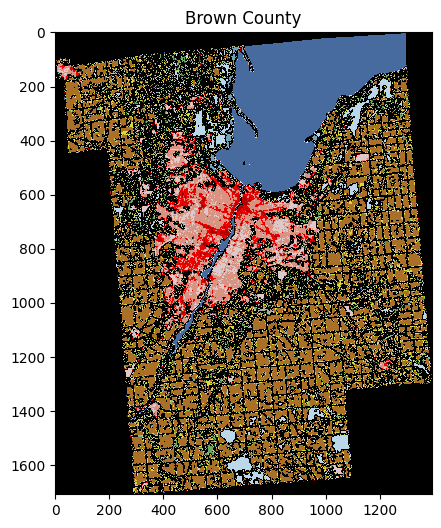

In [19]:
#Q13: 
land = rasterio.open("zip://../p6/land.zip!wi.tif")
counties = gpd.read_file("counties.geojson")
brown = counties[counties["NAME"] == "Brown County"]["geometry"]
matrix, _ = mask(land, brown.to_crs(land.crs), crop=True)
matrix=matrix[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)
ax.set_title("Brown County")
brown

In [20]:
#Q14: 

water=11
water_count=((matrix==water).astype(int).sum())/(matrix!=0).astype(int).sum()
water_count

0.13797526789725206

In [21]:
crop_counts={}
for name in counties["NAME"]:
    geom =  counties[counties["NAME"] == name]["geometry"]
    matrix, _ = mask(land, geom.to_crs(land.crs), crop=True)
    matrix=matrix[0]
    county_crops = (matrix == 82).astype(int).sum()
    curr_pop= counties[counties["NAME"] == name]["POP100"]
    crop_counts[int(curr_pop)]= int(county_crops)

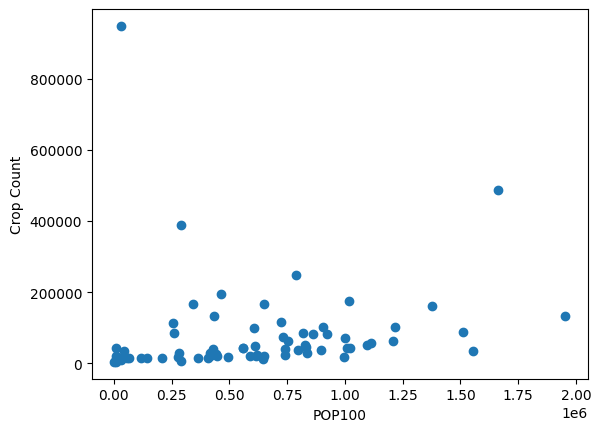

In [22]:
#Q15: 
plt.scatter( crop_counts.values(), crop_counts.keys())
plt.xlabel("POP100")
plt.ylabel("Crop Count")
plt.show()

In [23]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}


In [24]:
#Part 1:
tracts = gpd.read_file("tracts.shp")

In [25]:
#Part1:
count = 0
matrix_list=[]
for key in land_use:
    statlist=[]
    if count == 0:
        count+=1
        for ID in tracts["geometry"]:
            # geom=(row["geometry"])
            geom =  tracts[tracts["geometry"] == ID]["geometry"]
            matrix, _ = mask(land, geom.to_crs(land.crs), crop=True)
            matrix=matrix[0]
            landstat = (matrix == land_use[key]).astype(int).sum()
            statlist.append(landstat)
            matrix_list.append(matrix)
    else:
        for idx in range(len(matrix_list)):                 
            matrix=matrix_list[idx]
            landstat = (matrix == land_use[key]).astype(int).sum()
            statlist.append(landstat)            
    tracts[key]=statlist
    

In [26]:
#Part1: 
train, test = train_test_split(tracts, random_state=200, test_size=0.20)
features = list(land_use.keys())
X_train = train[features]
X_test = test[features]
y_train = train["POP100"]
y_test = test["POP100"]
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'Actual vs. Predicted POP100')

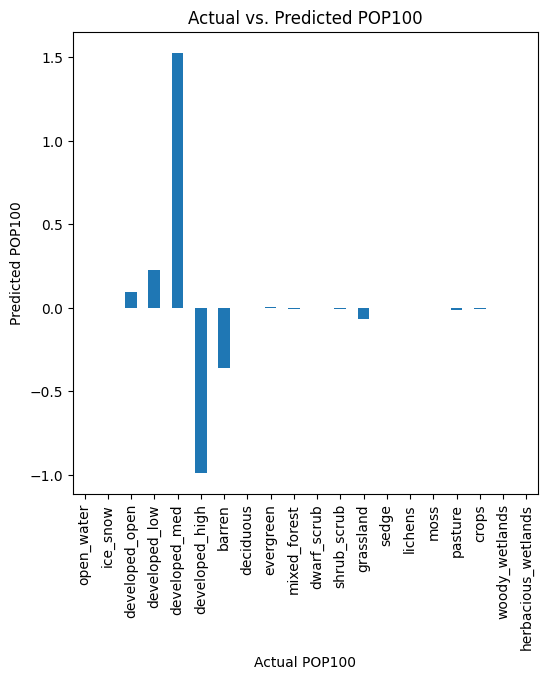

In [27]:
#Q16:  

pd.Series(lr.coef_, index=features).plot.bar(figsize=(6, 6))
y_pred = lr.predict(X_test)
plt.xlabel("Actual POP100")
plt.ylabel("Predicted POP100")
plt.title("Actual vs. Predicted POP100")

# The features that the model relies on most are "developed_mid" and "delevoped_low", because they have the highest coeficient values. 

In [28]:
#Part2: 


# model1:
train1, test1 = train_test_split(tracts, random_state=200, test_size=0.20)
features1 = ['developed_med']
X_train1 = train1[features1]
X_test1 = test1[features1]
y_train1 = train1["POP100"]
y_test1 = test1["POP100"]

lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)

#model2:

train2, test2 = train_test_split(tracts, random_state=200, test_size=0.20)
features2 = ['developed_low']
X_train2 = train2[features2]
X_test2 = test2[features2]
y_train2 = train2["POP100"]
y_test2 = test2["POP100"]

# create and fit linear regression model for model 2
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)


LinearRegression()

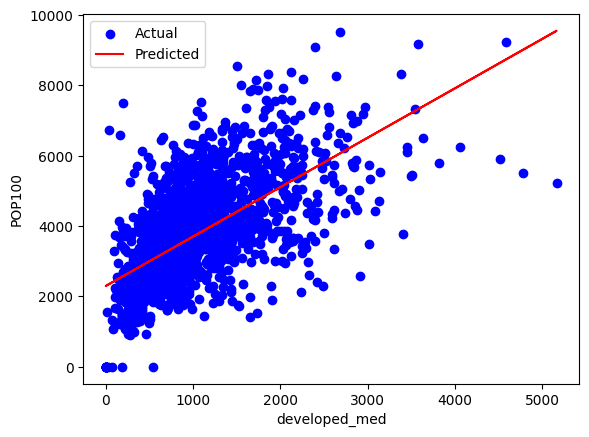

In [29]:
# model1 graph
fig, ax = plt.subplots()

ax.scatter(train1["developed_med"], train1["POP100"], label="Actual", color="b")
ax.scatter(test1["developed_med"], test1["POP100"], color="b")

x_fit = pd.DataFrame({"developed_med": tracts["developed_med"]})
y_fit = lr1.predict(x_fit)
ax.plot(x_fit, y_fit, label="Predicted", color="r")
ax.legend()
ax.set_xlabel("developed_med")
ax.set_ylabel("POP100")
plt.show()

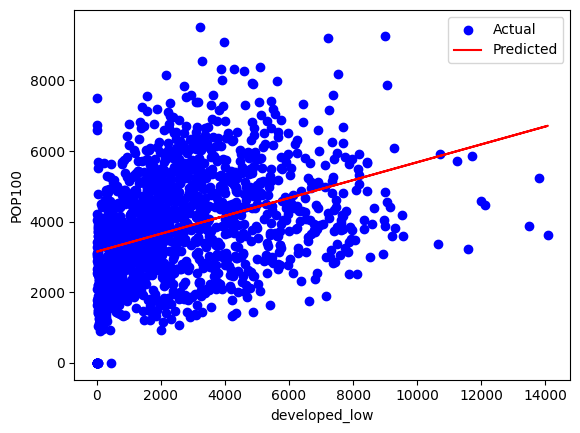

In [30]:
#model2 graph:

fig, ax = plt.subplots()

ax.scatter(train2["developed_low"], train2["POP100"], label="Actual", color="b")
ax.scatter(test2["developed_low"], test2["POP100"], color="b")

x_fit = pd.DataFrame({"developed_low": tracts["developed_low"]})
y_fit = lr2.predict(x_fit)
ax.plot(x_fit, y_fit, label="Predicted", color="r")
ax.legend()
ax.set_xlabel("developed_low")
ax.set_ylabel("POP100")
plt.show()


In [31]:
# model1 explained variance: 

predictions1 = lr1.predict(tracts[["developed_med"]])
print("model1 explained_variance: ", sklearn.metrics.explained_variance_score(tracts["POP100"], predictions1))

# model1 cross validation:
lr1_c=LinearRegression()
scores1 = cross_val_score(lr1_c, train1[["developed_med"]], train1["POP100"])
print("model1 cross val scores: ", scores1)
print("model1 cross val mean: ", scores1.mean())
print("model1 cross val variance: ", scores1.var())
print()


# model2 explained variance: 

predictions2 = lr2.predict(tracts[["developed_low"]])
print("model2 explained_variance: ", sklearn.metrics.explained_variance_score(tracts["POP100"], predictions2))

# model2 cross validation

lr2_c=LinearRegression()
scores2 = cross_val_score(lr2_c, train2[["developed_low"]], train2["POP100"])
print("model2 cross val scores:", scores2)
print("model2 cross val mean: ", scores2.mean())
print("model2 cross val variance: ", scores2.var())

model1 explained_variance:  0.3799013219345324
model1 cross val scores:  [0.34182646 0.43447685 0.36909783 0.39142832 0.38756763]
model1 cross val mean:  0.38487941886797955
model1 cross val variance:  0.0009225270346100092

model2 explained_variance:  0.13976906285654966
model2 cross val scores: [0.11029853 0.18620742 0.1693759  0.06928823 0.09988374]
model2 cross val mean:  0.12701076312840723
model2 cross val variance:  0.0019292227346158653


In [32]:
#Q17: 


sklearn.metrics.explained_variance_score(tracts["POP100"], predictions1)

# I would recomend model 1 because it has a higher cross validation mean and lower variance that model 2(shown in cell above). Model 1 also has an explained variance greater than 0.35, but model 2 does not. Both models are pretty simplistic, as i did not apply sklearn pipeline commands to either model.this is a clear indicator that "developed_med" is one of the most signifigant factors that influences "POP100", and may even by the most influential out of all the features from the land_use dictionary"

0.3799013219345324